# Modelling/plots - ENSO vs. yield

In [165]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr

In [212]:
### Load datasets 

# ENSO
nino = pd.read_csv('data/Nino34.csv')
nino_south = pd.read_csv('data/nino34_annual_mean_south.csv')
nino_north = pd.read_csv('data/nino34_annual_mean_north.csv')
nino_tropic = pd.read_csv('data/nino34_annual_mean_tropic.csv')
nino_hsiang = pd.read_csv('data/nino34_annual_mean_hsiang2011.csv')
nino_south_var = pd.read_csv('data/nino34_annual_variance_south.csv')
nino_north_var = pd.read_csv('data/nino34_annual_variance_north.csv')
nino_tropic_var = pd.read_csv('data/nino34_annual_variance_tropic.csv')

# IOD
iod_south = pd.read_csv('data/dmi_annual_mean_south.csv')
iod_north = pd.read_csv('data/dmi_annual_mean_north.csv')
iod_tropic = pd.read_csv('data/dmi_annual_mean_tropic.csv')
iod_hsiang = pd.read_csv('data/dmi_annual_mean_hsiang2011.csv')
iod_south_var = pd.read_csv('data/dmi_annual_variance_south.csv')
iod_north_var = pd.read_csv('data/dmi_annual_variance_north.csv')
iod_tropic_var = pd.read_csv('data/dmi_annual_variance_tropic.csv')
iod_hsiang_var = pd.read_csv('data/dmi_annual_variance_hsiang2011.csv')

# PDO
pdo_south = pd.read_csv('data/pdo_annual_mean_south.csv')
pdo_north = pd.read_csv('data/pdo_annual_mean_north.csv')
pdo_tropic = pd.read_csv('data/pdo_annual_mean_tropic.csv')
pdo_hsiang = pd.read_csv('data/pdo_annual_mean_hsiang2011.csv')
pdo_south_var = pd.read_csv('data/pdo_annual_variance_south.csv')
pdo_north_var = pd.read_csv('data/pdo_annual_variance_north.csv')
pdo_tropic_var = pd.read_csv('data/pdo_annual_variance_tropic.csv')      

# AMO
amo_south = pd.read_csv('data/amo_annual_mean_south.csv')
amo_north = pd.read_csv('data/amo_annual_mean_north.csv')
amo_tropic = pd.read_csv('data/amo_annual_mean_tropic.csv')
amo_south_var = pd.read_csv('data/amo_annual_variance_south.csv')
amo_north_var = pd.read_csv('data/amo_annual_variance_north.csv')
amo_tropic_var = pd.read_csv('data/amo_annual_variance_tropic.csv')    

# NAO
nao_south = pd.read_csv('data/nao_annual_mean_south.csv')
nao_north = pd.read_csv('data/nao_annual_mean_north.csv')
nao_tropic = pd.read_csv('data/nao_annual_mean_tropic.csv')
nao_south_var = pd.read_csv('data/nao_annual_variance_south.csv')
nao_north_var = pd.read_csv('data/nao_annual_variance_north.csv')
nao_tropic_var = pd.read_csv('data/nao_annual_variance_tropic.csv')    

### Split FAO grape data by country
fao_yield = pd.read_csv('data/FAOSTAT_yield.csv')
fao_aus = fao_yield[fao_yield['Area']=='Australia']
fao_us = fao_yield[fao_yield['Area']=='United States of America']
fao_fr = fao_yield[fao_yield['Area']=='France']
fao_sa = fao_yield[fao_yield['Area']=='South Africa']
fao_es = fao_yield[fao_yield['Area']=='Spain']
fao_it = fao_yield[fao_yield['Area']=='Italy']
fao_ar = fao_yield[fao_yield['Area']=='Argentina']
fao_ch = fao_yield[fao_yield['Area']=='Chile']



Text(0.06, 0.5, 'Index ($^\\circ$C)')

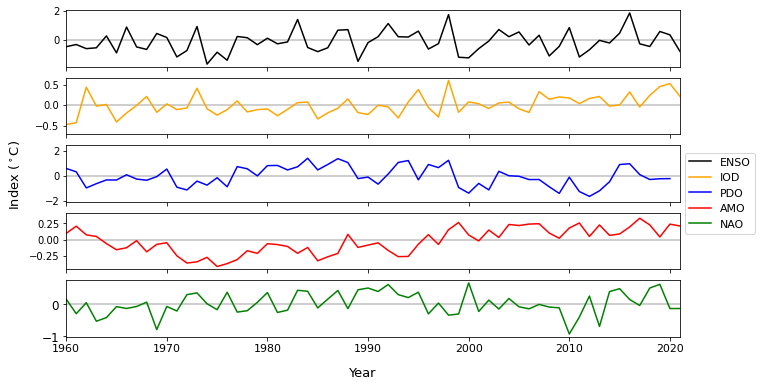

In [289]:
# Timeseries of all major climate patterns 

fig, axs = plt.subplots(5, 1, sharex='col',figsize=(11,6))

axs[0].axhline(y=0, color='grey', alpha=0.5)
axs[0].plot(nino_south['year'],nino_south['nino34_mean_south'],label='ENSO', color='black')

axs[1].axhline(y=0, color='grey', alpha=0.5)
axs[1].plot(iod_south['year'],iod_south['dmi_mean_south'], label='IOD', color='orange')

axs[2].axhline(y=0, color='grey', alpha=0.5)
axs[2].plot(pdo_south['year'],pdo_south['pdo_mean_south'], label='PDO', color='blue')

axs[3].axhline(y=0, color='grey', alpha=0.5)
axs[3].plot(amo_south['year'],amo_south['amo_mean_south'], label='AMO', color='red')

axs[4].axhline(y=0, color='grey', alpha=0.5)
axs[4].plot(nao_south['year'],nao_south['nao_mean_south'], label='NAO', color='green')

custom_xlim=(1960,2021)
plt.setp(axs,xlim=custom_xlim)
fig.legend(loc='center right', fontsize=11)

plt.yticks(fontsize=12)
plt.xticks(fontsize=11)
fig.text(0.5, 0.04, 'Year', ha='center', va='center',size=13)
fig.text(0.06, 0.5, 'Index ($^\circ$C)', ha='center', va='center', rotation='vertical',size=13)


## Index mean vs. yield

In [315]:
def mean_yield(index):
    """
    index: chosen climate pattern ['IOD','PDO','ENSO','AMO', NAO]
    return:  produces 2x4 scatter plots of mean annual index vs. grape yield
    """
    if index == 'IOD':
        index_south = iod_south
        index_var_south = 'dmi_mean_south'
        index_north = iod_north
        index_var_north = 'dmi_mean_north'
        index_tropic = iod_tropic
        index_var_tropic = 'dmi_mean_tropic'
    if index == 'PDO':
        index_south = pdo_south
        index_var_south = 'pdo_mean_south'
        index_north = pdo_north
        index_var_north = 'pdo_mean_north'
        index_tropic = pdo_tropic
        index_var_tropic = 'pdo_mean_tropic'
    if index == 'ENSO':
        index_south = nino_south
        index_var_south = 'nino34_mean_south'
        index_north = nino_north
        index_var_north = 'nino34_mean_north'
        index_tropic = nino_tropic
        index_var_tropic = 'nino34_mean_tropic'
    if index == 'AMO':
        index_south = amo_south
        index_var_south = 'amo_mean_south'
        index_north = amo_north
        index_var_north = 'amo_mean_north'
        index_tropic = amo_tropic
        index_var_tropic = 'amo_mean_tropic'
    if index == 'NAO':
        index_south = nao_south
        index_var_south = 'nao_mean_south'
        index_north = nao_north
        index_var_north = 'nao_mean_north'
        index_tropic = nao_tropic
        index_var_tropic = 'nao_mean_tropic'
        
    df_aus = fao_aus.merge(index_south, left_on='Year', right_on='year')
    df_us = fao_us.merge(index_north, left_on='Year', right_on='year')
    df_fr = fao_fr.merge(index_north, left_on='Year', right_on='year')  # France
    df_sa = fao_sa.merge(index_tropic, left_on='Year', right_on='year') # South Africa
    df_es = fao_es.merge(index_north, left_on='Year', right_on='year')  # Spain
    df_it = fao_it.merge(index_north, left_on='Year', right_on='year')
    df_ar = fao_ar.merge(index_south, left_on='Year', right_on='year')
    df_ch = fao_ch.merge(index_south, left_on='Year', right_on='year')

    lm = LinearRegression()
    lm1 = LinearRegression() 
    lm2 = LinearRegression() 
    lm3 = LinearRegression() 
    lm4 = LinearRegression() 
    lm5 = LinearRegression() 
    lm6 = LinearRegression() 
    lm7 = LinearRegression() 

    lm_aus = lm.fit(np.array(df_aus[index_var_south]).reshape(-1,1), df_aus['Value'])
    lm_us = lm1.fit(np.array(df_us[index_var_north]).reshape(-1,1), df_us['Value'])
    lm_fr = lm2.fit(np.array(df_fr[index_var_north]).reshape(-1,1), df_fr['Value'])
    lm_sa = lm3.fit(np.array(df_sa[index_var_tropic]).reshape(-1,1), df_sa['Value'])
    lm_es = lm4.fit(np.array(df_es[index_var_north]).reshape(-1,1), df_es['Value'])
    lm_it = lm5.fit(np.array(df_it[index_var_north]).reshape(-1,1), df_it['Value'])
    lm_ar = lm6.fit(np.array(df_ar[index_var_south]).reshape(-1,1), df_ar['Value'])
    lm_ch = lm7.fit(np.array(df_ch[index_var_south]).reshape(-1,1), df_ch['Value'])



    #plt.figure()
    fig, axs = plt.subplots(2, 4, figsize=(16,10))
    #fig.figsize=(14,8)
    ax00 = axs[0, 0].scatter(df_aus[index_var_south], np.log(df_aus['Value']),c=df_aus['Year'],label='Australia')
    axs[0, 0].plot(df_aus[index_var_south].sort_values(ascending=True), np.log(lm_aus.coef_ * df_aus[index_var_south].sort_values(ascending=True) + lm_aus.intercept_), color='black')
    axs[0, 0].title.set_text('Australia')


    axs[1, 0].scatter(df_us[index_var_north], np.log(df_us['Value']),c=df_us['Year'], label='US')
    axs[1, 0].plot(df_us[index_var_north].sort_values(ascending=True), np.log(lm_us.coef_ * df_us[index_var_north].sort_values(ascending=True) + lm_us.intercept_), color= 'black')
    axs[1, 0].title.set_text('USA')


    axs[1, 1].scatter(df_fr[index_var_north], np.log(df_fr['Value']),c=df_fr['Year'], label='France')
    axs[1, 1].plot(df_fr[index_var_north].sort_values(ascending=True), np.log(lm_fr.coef_ * df_fr[index_var_north].sort_values(ascending=True) + lm_fr.intercept_), color= 'black')
    axs[1, 1].title.set_text('France')


    axs[0, 3].scatter(df_sa[index_var_tropic], np.log(df_sa['Value']), c=df_sa['Year'],label='S. Africa')
    axs[0, 3].plot(df_sa[index_var_tropic].sort_values(ascending=True), np.log(lm_sa.coef_ * df_sa[index_var_tropic].sort_values(ascending=True) + lm_sa.intercept_), color= 'black')
    axs[0, 3].title.set_text('South Africa')


    axs[1, 2].scatter(df_es[index_var_north], np.log(df_es['Value']), c=df_es['Year'],label='Spain')
    axs[1, 2].plot(df_es[index_var_north].sort_values(ascending=True), np.log(lm_es.coef_ * df_es[index_var_north].sort_values(ascending=True) + lm_es.intercept_), color= 'black')
    axs[1, 2].title.set_text('Spain')

    axs[0, 1].scatter(df_ar[index_var_south], np.log(df_ar['Value']), c=df_ar['Year'],label='Argentina')
    axs[0, 1].plot(df_ar[index_var_south].sort_values(ascending=True), np.log(lm_ar.coef_ * df_ar[index_var_south].sort_values(ascending=True) + lm_ar.intercept_), color= 'black')
    axs[0, 1].title.set_text('Argentina')

    axs[0, 2].scatter(df_ch[index_var_south], np.log(df_ch['Value']), c=df_ch['Year'],label='Chile')
    axs[0, 2].plot(df_ch[index_var_south].sort_values(ascending=True), np.log(lm_ch.coef_ * df_ch[index_var_south].sort_values(ascending=True) + lm_ch.intercept_), color= 'black')
    axs[0, 2].title.set_text('Chile')

    axs[1, 3].scatter(df_it[index_var_north], np.log(df_it['Value']), c=df_it['Year'],label='Italy')
    axs[1, 3].plot(df_it[index_var_north].sort_values(ascending=True), np.log(lm_it.coef_ * df_it[index_var_north].sort_values(ascending=True) + lm_it.intercept_), color= 'black')
    axs[1, 3].title.set_text('Italy')

    #fig.text(0.06, 0.5, 'IOD', ha='center', va='center', rotation='vertical',size=12)
    fig.text(0.5, 0.04, index, ha='center', va='center',size=12)
    fig.text(0.06, 0.5, 'Log yield (hg/ha)', ha='center', va='center', rotation='vertical',size=12)
    cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
    fig.colorbar(ax00, cax=cbar_ax)
    fig.text(0.96, 0.88, 'Time', ha='center', va='center', size=12)
    
    ### Correlations

    print('Australia: ',pearsonr(np.log(df_aus['Value']),(df_aus[index_var_south])))
    print('US: ',pearsonr(np.log(df_us['Value']),(df_us[index_var_north])))
    print('France: ',pearsonr(np.log(df_fr['Value']),(df_fr[index_var_north])))
    print('S. Africa: ',pearsonr(np.log(df_sa['Value']),(df_sa[index_var_tropic])))
    print('Spain: ',pearsonr(np.log(df_es['Value']),(df_es[index_var_north])))
    print('Italy: ',pearsonr(np.log(df_it['Value']),(df_it[index_var_north])))
    print('Argentina: ',pearsonr(np.log(df_ar['Value']),(df_ar[index_var_south])))
    print('Chile: ',pearsonr(np.log(df_ch['Value']),(df_ch[index_var_south])))
    x = pearsonr(np.log(df_aus['Value']),(df_aus[index_var_south]))
    return



Text(0.96, 0.88, 'Time')

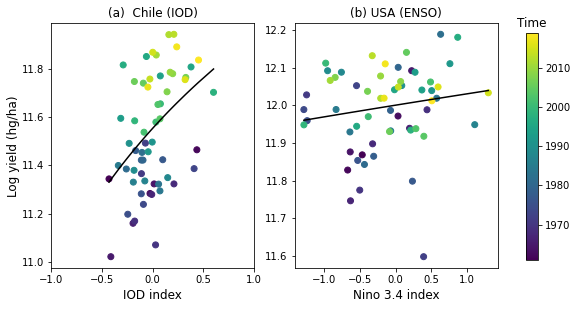

In [367]:
df_us = fao_us.merge(nino_north, left_on='Year', right_on='year')
df_ch = fao_ch.merge(iod_south, left_on='Year', right_on='year')


lm1 = LinearRegression()  
lm7 = LinearRegression() 

lm_us = lm1.fit(np.array(df_us['nino34_mean_north']).reshape(-1,1), df_us['Value'])
lm_ch = lm7.fit(np.array(df_ch['dmi_mean_south']).reshape(-1,1), df_ch['Value'])


#plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8,4.5))
#fig.figsize=(14,8)

axs[1].scatter(df_us['nino34_mean_north'], np.log(df_us['Value']),c=df_us['Year'], label='US')
axs[1].plot(df_us['nino34_mean_north'].sort_values(ascending=True), np.log(lm_us.coef_ * df_us['nino34_mean_north'].sort_values(ascending=True) + lm_us.intercept_), color= 'black')
axs[1].title.set_text('(b) USA (ENSO)')
axs[1].set_xlabel('Nino 3.4 index', fontsize=12)

axs[0].scatter(df_ch['dmi_mean_south'], np.log(df_ch['Value']), c=df_ch['Year'],label='Chile')
axs[0].plot(df_ch['dmi_mean_south'].sort_values(ascending=True), np.log(lm_ch.coef_ * df_ch['dmi_mean_south'].sort_values(ascending=True) + lm_ch.intercept_), color= 'black')
axs[0].title.set_text('(a)  Chile (IOD)')
axs[0].set_xlabel('IOD index', fontsize=12)

custom_xlim=(-1,1)
plt.setp(axs[0],xlim=custom_xlim)

#custom1_xlim=(-1.75,1.75)
#plt.setp(axs[1],xlim=custom1_xlim)

#fig.text(0.06, 0.5, 'IOD', ha='center', va='center', rotation='vertical',size=12)
#fig.text(0.5, 0.04, index, ha='center', va='center',size=12)
fig.text(0.06, 0.5, 'Log yield (hg/ha)', ha='center', va='center', rotation='vertical',size=12)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(ax00, cax=cbar_ax)
fig.text(0.96, 0.88, 'Time', ha='center', va='center', size=12)

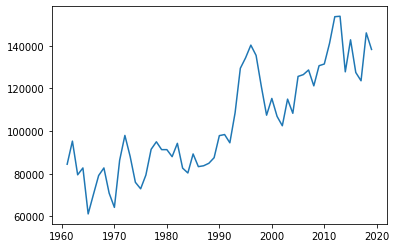

In [316]:
plt.plot(fao_ch['Year'],fao_ch['Value'])

Australia:  (0.13377300666329786, 0.31245036076258653)
US:  (0.15779832691135925, 0.23262120212290197)
France:  (-0.07986158247188718, 0.5476634484092077)
S. Africa:  (0.18779710230430358, 0.15434776369887682)
Spain:  (0.1780722958912486, 0.17722572613237)
Italy:  (0.23325197652094176, 0.07541675145389194)
Argentina:  (-0.05527138176492001, 0.6775695592867906)
Chile:  (0.13165283556599816, 0.320250791180557)


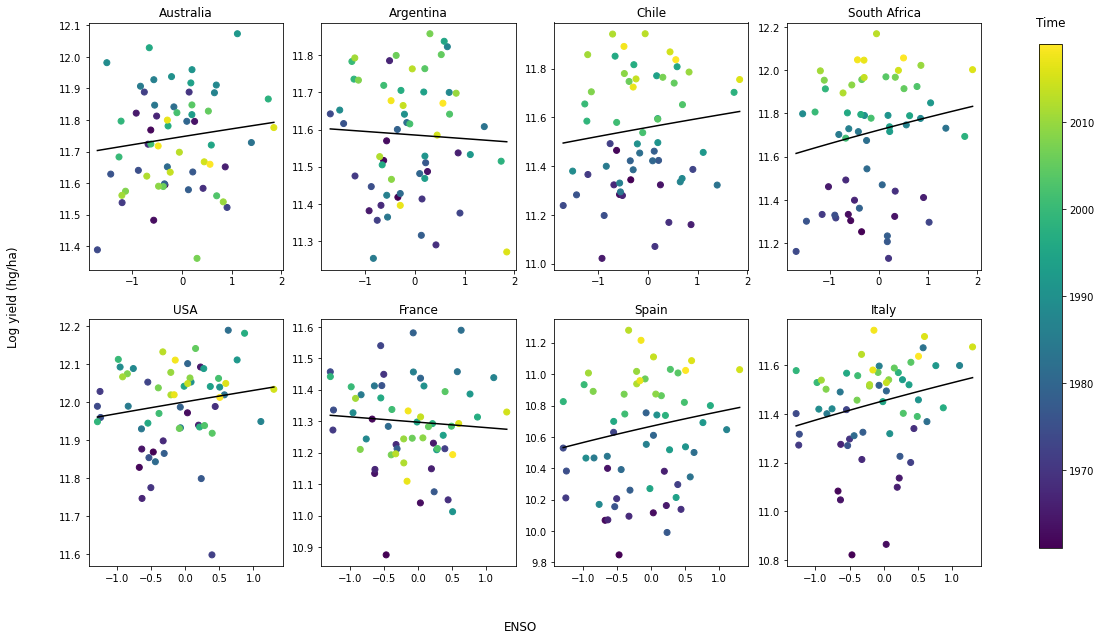

In [319]:
mean_yield('ENSO')


## Index variance vs. yield

In [229]:
def var_yield(index):
    """
    index: chosen climate pattern ['IOD','PDO','ENSO','AMO', NAO]
    return:  produces 2x4 scatter plots of mean annual index vs. grape yield
    """
    if index == 'IOD':
        index_south = iod_south_var
        index_var_south = 'dmi_mean_south'
        index_north = iod_north_var
        index_var_north = 'dmi_mean_north'
        index_tropic = iod_tropic_var
        index_var_tropic = 'dmi_mean_tropic'
    if index == 'PDO':
        index_south = pdo_south_var
        index_var_south = 'pdo_mean_south'
        index_north = pdo_north_var
        index_var_north = 'pdo_mean_north'
        index_tropic = pdo_tropic_var
        index_var_tropic = 'pdo_mean_tropic'
    if index == 'ENSO':
        index_south = nino_south_var
        index_var_south = 'nino34_mean_south'
        index_north = nino_north_var
        index_var_north = 'nino34_mean_north'
        index_tropic = nino_tropic_var
        index_var_tropic = 'nino34_mean_tropic'
    if index == 'AMO':
        index_south = amo_south
        index_var_south = 'amo_mean_south'
        index_north = amo_north
        index_var_north = 'amo_mean_north'
        index_tropic = amo_tropic
        index_var_tropic = 'amo_mean_tropic'
    if index == 'NAO':
        index_south = nao_south
        index_var_south = 'nao_mean_south'
        index_north = nao_north
        index_var_north = 'nao_mean_north'
        index_tropic = nao_tropic
        index_var_tropic = 'nao_mean_tropic'
        
    df_aus = fao_aus.merge(index_south, left_on='Year', right_on='year')
    df_us = fao_us.merge(index_north, left_on='Year', right_on='year')
    df_fr = fao_fr.merge(index_north, left_on='Year', right_on='year')  # France
    df_sa = fao_sa.merge(index_tropic, left_on='Year', right_on='year') # South Africa
    df_es = fao_es.merge(index_north, left_on='Year', right_on='year')  # Spain
    df_it = fao_it.merge(index_north, left_on='Year', right_on='year')
    df_ar = fao_ar.merge(index_south, left_on='Year', right_on='year')
    df_ch = fao_ch.merge(index_south, left_on='Year', right_on='year')

    lm = LinearRegression()
    lm1 = LinearRegression() 
    lm2 = LinearRegression() 
    lm3 = LinearRegression() 
    lm4 = LinearRegression() 
    lm5 = LinearRegression() 
    lm6 = LinearRegression() 
    lm7 = LinearRegression() 

    lm_aus = lm.fit(np.array(df_aus[index_var_south]).reshape(-1,1), df_aus['Value'])
    lm_us = lm1.fit(np.array(df_us[index_var_north]).reshape(-1,1), df_us['Value'])
    lm_fr = lm2.fit(np.array(df_fr[index_var_north]).reshape(-1,1), df_fr['Value'])
    lm_sa = lm3.fit(np.array(df_sa[index_var_tropic]).reshape(-1,1), df_sa['Value'])
    lm_es = lm4.fit(np.array(df_es[index_var_north]).reshape(-1,1), df_es['Value'])
    lm_it = lm5.fit(np.array(df_it[index_var_north]).reshape(-1,1), df_it['Value'])
    lm_ar = lm6.fit(np.array(df_ar[index_var_south]).reshape(-1,1), df_ar['Value'])
    lm_ch = lm7.fit(np.array(df_ch[index_var_south]).reshape(-1,1), df_ch['Value'])



    #plt.figure()
    fig, axs = plt.subplots(2, 4, figsize=(16,10))
    #fig.figsize=(14,8)
    ax00 = axs[0, 0].scatter(df_aus[index_var_south], np.log(df_aus['Value']),c=df_aus['Year'],label='Australia')
    axs[0, 0].plot(df_aus[index_var_south].sort_values(ascending=True), np.log(lm_aus.coef_ * df_aus[index_var_south].sort_values(ascending=True) + lm_aus.intercept_), color='black')
    axs[0, 0].title.set_text('Australia')


    axs[1, 0].scatter(df_us[index_var_north], np.log(df_us['Value']),c=df_us['Year'], label='US')
    axs[1, 0].plot(df_us[index_var_north].sort_values(ascending=True), np.log(lm_us.coef_ * df_us[index_var_north].sort_values(ascending=True) + lm_us.intercept_), color= 'black')
    axs[1, 0].title.set_text('USA')


    axs[1, 1].scatter(df_fr[index_var_north], np.log(df_fr['Value']),c=df_fr['Year'], label='France')
    axs[1, 1].plot(df_fr[index_var_north].sort_values(ascending=True), np.log(lm_fr.coef_ * df_fr[index_var_north].sort_values(ascending=True) + lm_fr.intercept_), color= 'black')
    axs[1, 1].title.set_text('France')


    axs[0, 3].scatter(df_sa[index_var_tropic], np.log(df_sa['Value']), c=df_sa['Year'],label='S. Africa')
    axs[0, 3].plot(df_sa[index_var_tropic].sort_values(ascending=True), np.log(lm_sa.coef_ * df_sa[index_var_tropic].sort_values(ascending=True) + lm_sa.intercept_), color= 'black')
    axs[0, 3].title.set_text('South Africa')


    axs[1, 2].scatter(df_es[index_var_north], np.log(df_es['Value']), c=df_es['Year'],label='Spain')
    axs[1, 2].plot(df_es[index_var_north].sort_values(ascending=True), np.log(lm_es.coef_ * df_es[index_var_north].sort_values(ascending=True) + lm_es.intercept_), color= 'black')
    axs[1, 2].title.set_text('Spain')

    axs[0, 1].scatter(df_ar[index_var_south], np.log(df_ar['Value']), c=df_ar['Year'],label='Argentina')
    axs[0, 1].plot(df_ar[index_var_south].sort_values(ascending=True), np.log(lm_ar.coef_ * df_ar[index_var_south].sort_values(ascending=True) + lm_ar.intercept_), color= 'black')
    axs[0, 1].title.set_text('Argentina')

    axs[0, 2].scatter(df_ch[index_var_south], np.log(df_ch['Value']), c=df_ch['Year'],label='Chile')
    axs[0, 2].plot(df_ch[index_var_south].sort_values(ascending=True), np.log(lm_ch.coef_ * df_ch[index_var_south].sort_values(ascending=True) + lm_ch.intercept_), color= 'black')
    axs[0, 2].title.set_text('Chile')

    axs[1, 3].scatter(df_it[index_var_north], np.log(df_it['Value']), c=df_it['Year'],label='Italy')
    axs[1, 3].plot(df_it[index_var_north].sort_values(ascending=True), np.log(lm_it.coef_ * df_it[index_var_north].sort_values(ascending=True) + lm_it.intercept_), color= 'black')
    axs[1, 3].title.set_text('Italy')

    #fig.text(0.06, 0.5, 'IOD', ha='center', va='center', rotation='vertical',size=12)
    fig.text(0.5, 0.04, index, ha='center', va='center',size=12)
    fig.text(0.06, 0.5, 'Yield', ha='center', va='center', rotation='vertical',size=12)
    cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
    fig.colorbar(ax00, cax=cbar_ax)
    fig.text(0.96, 0.88, 'Time', ha='center', va='center', size=12)
    
    ### Correlations

    print('Australia: ',pearsonr(np.log(df_aus['Value']),(df_aus[index_var_south])))
    print('US: ',pearsonr(np.log(df_us['Value']),(df_us[index_var_north])))
    print('France: ',pearsonr(np.log(df_fr['Value']),(df_fr[index_var_north])))
    print('S. Africa: ',pearsonr(np.log(df_sa['Value']),(df_sa[index_var_tropic])))
    print('Spain: ',pearsonr(np.log(df_es['Value']),(df_es[index_var_north])))
    print('Italy: ',pearsonr(np.log(df_it['Value']),(df_it[index_var_north])))
    print('Argentina: ',pearsonr(np.log(df_ar['Value']),(df_ar[index_var_south])))
    print('Chile: ',pearsonr(np.log(df_ch['Value']),(df_ch[index_var_south])))
    
    return


In [ ]:
var_yield('PDO')